## First, dependencies.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

## Next, set up and run your request.

We are going to use the Paleobiology Database's (PBDB's) "diversity calculation." You can find details about this operation here: https://paleobiodb.org/data1.2/occs/diversity_doc.html.

Before moving forward with the code, take a look at https://paleobiodb.org/classic/displayDownloadGenerator to view (interactively) how to construct an API call to PBDB. 

In [2]:

# Define the PBDB API URL for quick diversity
url = "https://paleobiodb.org/data1.2/occs/diversity.csv?&count=families&recent&time_reso=stage&min_ma=0&max_ma=600&envtype=marine"

# Download the CSV data
response = requests.get(url)
response.raise_for_status()  # Raise an error if the request failed

localFile = 'pbdbDiversity.csv'

# Save the response to a local file
with open(localFile, "w", encoding="utf-8") as f:
    f.write(response.text)

## Now, let us examine (and visualize) the data.

In [3]:
# Now, load the downloaded data into pandas
df = pd.read_csv(localFile)

# Let us inspect the columns
print(df.head())

   interval_no     interval_name  max_ma  min_ma  X_Ft  X_bL  X_FL  X_bt  \
0          922  Late Pleistocene   0.129  0.0117    26    28     5  1937   
1         1203         Chibanian   0.774  0.1290    12     8     1  1953   
2          740         Calabrian   1.800  0.7740    12    13     2  1949   
3          741          Gelasian   2.580  1.8000    17     5     0  1945   
4           96        Piacenzian   3.600  2.5800    16    14     2  1934   

   sampled_in_bin  implied_in_bin  n_occs  
0             796              19   26804  
1             659              11   25529  
2             763              12   49239  
3             503               9   10895  
4             769              14   31196  


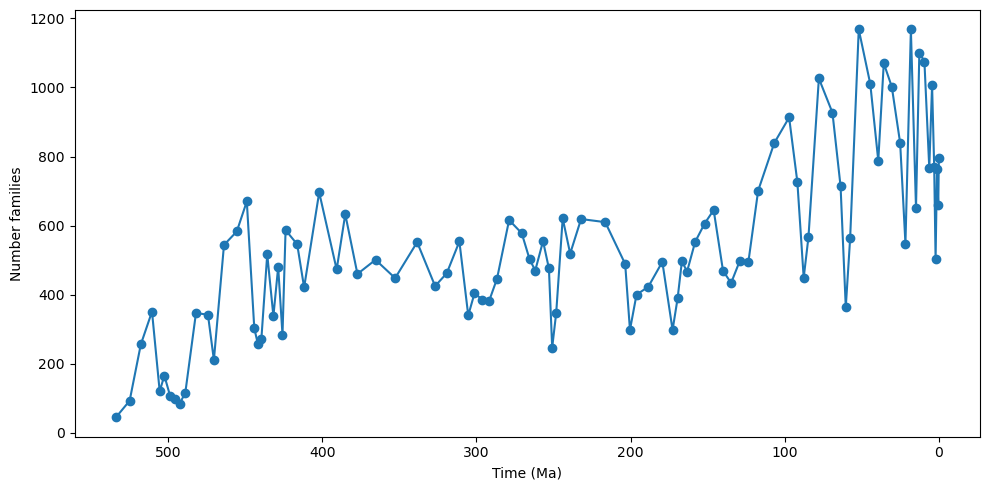

In [4]:
# Calculate the mid-point of each interval and add as a new column
df['mid'] = (df['max_ma'] + df['min_ma']) / 2

# Finally, let us plot
plt.figure(figsize=(10, 5))
plt.plot(df['mid'], df['sampled_in_bin'], marker='o')
plt.xlabel('Time (Ma)')
plt.ylabel('Number families')
plt.gca().invert_xaxis()  # Geological time: older to the left
plt.tight_layout()
plt.show()